### Importation des modules

In [1]:
!pip install tensorflowjs
import tensorflowjs as tfjs
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import pydotplus
from random import *
from tqdm import tqdm
import os

### Importation des deux datashets 'train' et 'test' depuis la librairie tensorflow_datasets

In [2]:
mnist = tf.keras.datasets.mnist
(train_images_og,train_targets),(test_images_og,test_targets)=mnist.load_data()

In [3]:
print(train_images_og.shape,train_targets.shape)
print(test_images_og.shape,test_targets.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
train_images_og[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Quelques exemples d'images avec le label associé

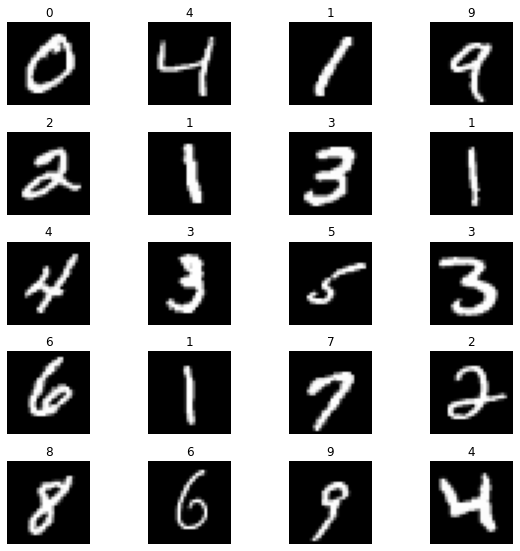

In [5]:
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5

for i in range(1, columns*rows +1):
    img = train_images_og[i]
    fig.add_subplot(rows, columns, i)
    fig.tight_layout()
    plt.title(train_targets[i]) 
    plt.axis('off')
    plt.imshow(img,cmap='gray')
plt.show()

### Répartition des classes

In [6]:
repartition_train=np.zeros((10))
for i in range(len(train_targets)):
    repartition_train[train_targets[i]]+=1
               
print(repartition_train)

[5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]


<BarContainer object of 10 artists>

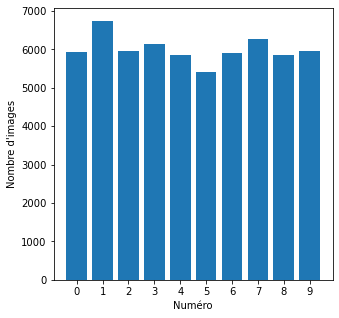

In [7]:
fig=plt.figure(figsize=(5, 5))
ax=fig.add_subplot(111)
ax.set_xlabel('Numéro')
ax.set_ylabel("Nombre d'images")
ax.set_xticks(np.linspace(0,9,10))
ax.bar(np.linspace(0,9,10), repartition_train)

In [8]:
repartition_test=np.zeros((10))
for i in range(len(test_targets)):
    repartition_test[train_targets[i]]+=1
               
print(repartition_test)

[1001. 1127.  991. 1032.  980.  863. 1014. 1070.  944.  978.]


<BarContainer object of 10 artists>

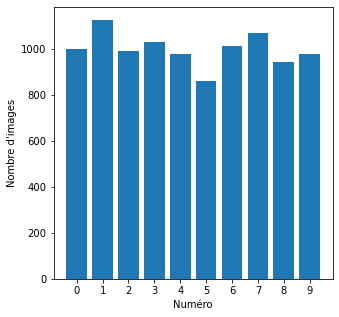

In [9]:
fig=plt.figure(figsize=(5, 5))
ax=fig.add_subplot(111)
ax.set_xlabel('Numéro')
ax.set_ylabel("Nombre d'images")
ax.set_xticks(np.linspace(0,9,10))
ax.bar(np.linspace(0,9,10), repartition_test)

# Traitement des images  

In [10]:
train_images=np.array(train_images_og,dtype=np.float64)
test_images=np.array(test_images_og,dtype=np.float64)

## Normalisation
Maintenant, il faut normaliser les données avant de les injecter dans le modèle.   
### Calcul de la moyenne des valeurs des pixels et de l'écart type

In [11]:
train_mean=train_images.mean()
train_std=train_images.std()
print(train_mean)
print(train_std)
test_mean=test_images.mean()
test_std=test_images.std()


33.318421449829934
78.56748998339798


### Normalisation
On applique z = $\frac{x - mean}{std}$  pour normaliser nos données

In [12]:
for i in range (train_images.shape[0]):
    train_images[i]=(train_images[i]-train_mean)/train_std

for i in range (test_images.shape[0]):
    test_images[i]=(test_images[i]-test_mean)/test_std

In [13]:
print(train_images.mean())
print(train_images.std())

-3.064638490070051e-17
0.9999999999999998


### Affichage du tableau correspondant à une image normalisée

In [14]:
train_images[0]

array([[-0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
        -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
        -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
        -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
        -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
        -0.42407389, -0.42407389, -0.42407389],
       [-0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
        -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
        -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
        -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
        -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
        -0.42407389, -0.42407389, -0.42407389],
       [-0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
        -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
        -0.42407389, -0.4240

### Création d'objets TensorFlow pour gérer plus facilement les données

In [15]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)
print(train_images.shape)


entrainement_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_targets))
validation_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_targets))

(60000, 28, 28, 1)


# Modèle
Maintenant qu'on a nos données normalisées, on peut créer notre modèle
## Structure du modèle

In [16]:
model = tf.keras.models.Sequential()

#Premiere convolution
model.add( tf.keras.layers.Conv2D(32, 4, padding='same', activation='relu', name="conv1"))
model.add( tf.keras.layers.MaxPool2D((2,2)))
model.add( tf.keras.layers.Dropout(rate=0.1))

#Deuxieme convolution
model.add( tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu', name="conv2"))
model.add( tf.keras.layers.MaxPool2D((2,2)))
model.add( tf.keras.layers.Dropout(rate=0.2))

#Troisieme convolution
model.add( tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu', name="conv3"))
model.add( tf.keras.layers.MaxPool2D((2,2)))
model.add( tf.keras.layers.Dropout(rate=0.3))

# Mise sous forme d'un vecteur
model.add( tf.keras.layers.Flatten(name="flatten"))

# Ajout d'une couche de reseau de neurone
model.add( tf.keras.layers.Dense(512, activation='relu', name="d1"))
model.add( tf.keras.layers.Dropout(rate=0.5))

#Ajout d'une couche de 10 neurones correspondant aux 10 chiffres à détecter
model.add( tf.keras.layers.Dense(10, activation='softmax', name="output"))

In [17]:
# model.summary()

## Fonction d'erreur et optimiseur

In [18]:
fonction_erreur = tf.keras.losses.SparseCategoricalCrossentropy()
optimiseur = tf.keras.optimizers.Adam(learning_rate=0.001)

In [19]:
# Erreur
erreur_entrainement_totale = tf.keras.metrics.Mean(name='train_loss')
erreur_validation_totale = tf.keras.metrics.Mean(name='valid_loss')
# Precision
precision_entrainement_totale = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
precision_validation_totale = tf.keras.metrics.SparseCategoricalAccuracy(name='valid_accuracy')

In [20]:
@tf.function
def predict(image):
    prediction=model(image)
    return prediction

# Entrainement
## Fonction d'entrainement

In [21]:
@tf.function #décorateur de fonction qui transforme le modèle en graphe pour des calculs plus rapides
def entrainement(image, targets):
    with tf.GradientTape() as tape:
        # Prediction sur le batch
        predictions = model(image,training=True)
        # Calcul de l'erreur
        erreur = fonction_erreur(targets, predictions)
        
    # Calcul du gradient pour réduire l'erreur
    gradients = tape.gradient(erreur, model.trainable_variables)
    
    # Optimisation des poids du modèle
    optimiseur.apply_gradients(zip(gradients, model.trainable_variables))
    
    # Mise à jour des variables de suivi de l'entrainement
    erreur_entrainement_totale(erreur)
    precision_entrainement_totale(targets, predictions)

## Fonction de validation

In [22]:
@tf.function
def validation(image, targets):
    predictions = model(image,training=False)
    erreur_validation = fonction_erreur(targets, predictions)
    # Mise à jour des variables de suivi de la validation
    erreur_validation_totale(erreur_validation)
    precision_validation_totale(targets, predictions)
    return predictions

## Lancement de l'entrainement

In [23]:
nombre_entrainements=8
taille_batch=32

for i in range(nombre_entrainements):
    b=0
    print('Epochs:',i+1)
    batch = entrainement_dataset.batch(taille_batch)
    for images, targets in batch:
        entrainement(images,targets)
        b+=taille_batch
    print(f'Entrainement :{erreur_entrainement_totale.result()} et precision ={precision_entrainement_totale.result()*100}')
    batch = validation_dataset.batch(taille_batch*10)
    for images, targets in batch:
        validation(images,targets)  
    print(f'Validation : erreur={erreur_validation_totale.result()} et precision = {precision_validation_totale.result()*100}')
    
    erreur_entrainement_totale.reset_states()
    precision_entrainement_totale.reset_states()
    erreur_validation_totale.reset_states()
    precision_validation_totale.reset_states()

Epochs: 1
Entrainement :0.17847637832164764 et precision =94.38333129882812
Validation : erreur=0.04135847091674805 et precision = 98.73999786376953
Epochs: 2
Entrainement :0.06953942775726318 et precision =97.86833190917969
Validation : erreur=0.03426921367645264 et precision = 98.83000183105469
Epochs: 3
Entrainement :0.055803332477808 et precision =98.36833190917969
Validation : erreur=0.027425313368439674 et precision = 99.08999633789062
Epochs: 4
Entrainement :0.049787405878305435 et precision =98.49166870117188
Validation : erreur=0.021234242245554924 et precision = 99.30999755859375
Epochs: 5
Entrainement :0.04569263011217117 et precision =98.66500091552734
Validation : erreur=0.023295031860470772 et precision = 99.30999755859375
Epochs: 6
Entrainement :0.03944398835301399 et precision =98.84666442871094
Validation : erreur=0.0268576517701149 et precision = 99.0999984741211
Epochs: 7
Entrainement :0.042565714567899704 et precision =98.77166748046875
Validation : erreur=0.0186958

## Sauvegarde/chargement  du modèle

In [24]:
# model.save('svnh4')
# model=tf.keras.models.load_model('mnist')


# Résultats

In [25]:
@tf.function
def call(model,image):
    prediction=model(image,training=False)
    return prediction

In [26]:
echec=[]
echec_numeros=np.zeros((10,10))
for i in tqdm(range(len(test_targets))):
    prediction=call(model,test_images[i].reshape((1,28,28,1))).numpy()
    numero_predit=np.argmax(prediction)
    if numero_predit!=test_targets[i]:
        echec.append([test_targets[i],test_images_og[i],prediction])
        echec_numeros[test_targets[i],numero_predit]+=1
print(f'Precision={100*(1-len(echec)/len(test_targets))}')

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:23<00:00, 425.73it/s]

Precision=99.22


## Nombre d'erreur par numéros

<BarContainer object of 10 artists>

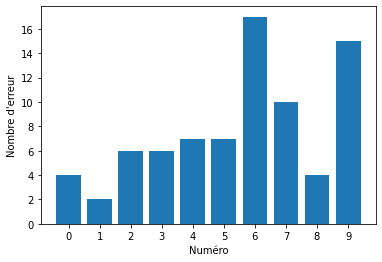

In [27]:
echec_numeros_bis=np.sum(echec_numeros,axis=1)
fig=plt.figure()
ax=fig.add_subplot(111)
ax.set_xlabel('Numéro')
ax.set_ylabel("Nombre d'erreur")
ax.set_xticks(np.linspace(0,9,10))
ax.bar(np.linspace(0,9,10), echec_numeros_bis)

## Pourcentage d'erreur par numéros

<BarContainer object of 10 artists>

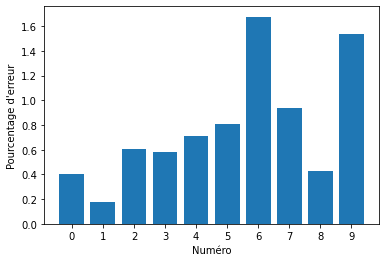

In [28]:
echec_numeros_pourcentage=np.zeros(10)
for i in range(10):
    echec_numeros_pourcentage[i]=100*echec_numeros_bis[i]/repartition_test[i]
fig=plt.figure()
ax=fig.add_subplot(111)
ax.set_xlabel('Numéro')
ax.set_ylabel("Pourcentage d'erreur")
ax.set_xticks(np.linspace(0,9,10))
ax.bar(np.linspace(0,9,10), echec_numeros_pourcentage)

## Répartition des numéros prédits par numéro

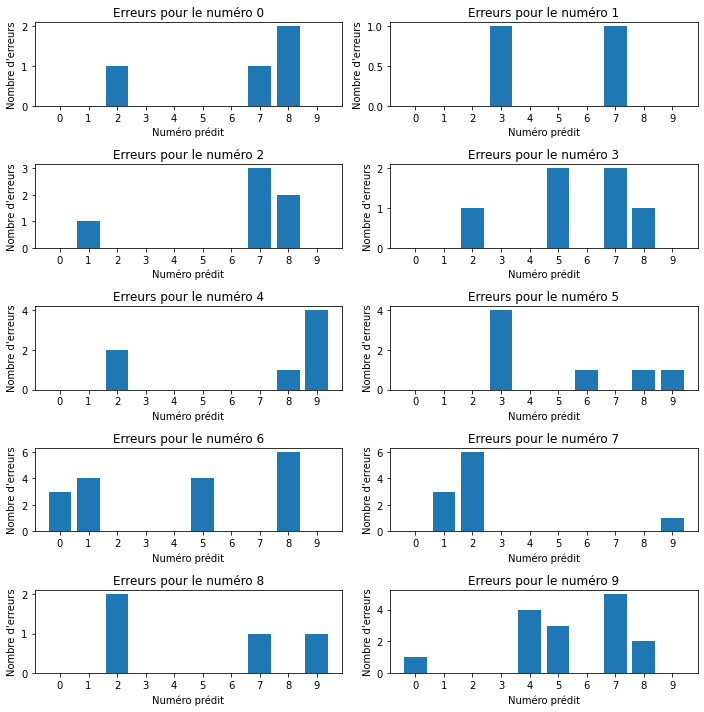

In [29]:
fig=plt.figure(figsize=(10,10))

for i in range(10):
    ax=fig.add_subplot(5,2,i+1)
    fig.tight_layout()
    ax.set_xlabel('Numéro prédit')
    ax.set_ylabel("Nombre d'erreurs")
    ax.set_xticks(np.linspace(0,9,10))
    ax.set_title(f'Erreurs pour le numéro {i}')
    ax.bar(np.linspace(0,9,10), echec_numeros[i])

On remarque que les erreurs sont souvent faites avec des numéros assez ressemblants.

## Affichage des valeurs prédites pour quelques erreurs

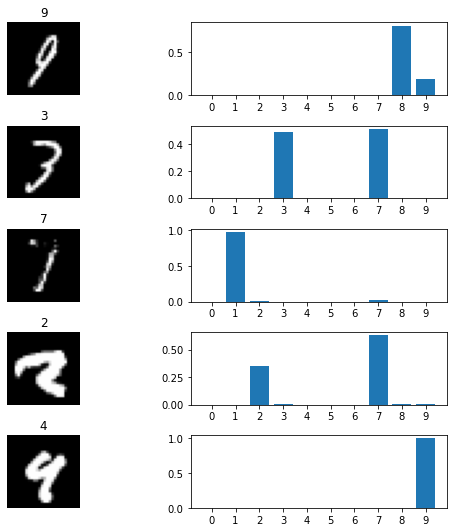

In [30]:
nb_erreurs_affichees=5
fig=plt.figure(figsize=(8,nb_erreurs_affichees*1.5))
for i in range(nb_erreurs_affichees):
    index_erreurs = np.random.randint(len(echec))
    ax=fig.add_subplot(nb_erreurs_affichees,2,2*i+1)
    fig.tight_layout()
    ax.imshow(echec[index_erreurs][1],cmap='gray')
    ax.set_title(str(echec[index_erreurs][0]))
    ax.axis('off')
    ax=fig.add_subplot(nb_erreurs_affichees,2,2*(i+1))
    ax.set_xticks(np.linspace(0,9,10))
    ax.bar(np.linspace(0,9,10), echec[index_erreurs][2][0])
    

Les erreurs sont parfois pour des numéros très difficilement lisible ou des numéros très ressemblants. 
Et souvent le bon numéros est la deuxième prédiction donc le modèle est assez précis.

In [31]:
#tfjs.converters.save_keras_model(model,'models')

C:\Users\paulg\anaconda3\lib\site-packages\tensorflowjs\converters\keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)
